## __GP2 Taller de Bioinformatica Mexico - Vision general datos GP2 y AMP-PD__

```GP2 ❤️ Open Science 😍```

* __Modulo:__ Vision general datos GP2 y AMP-PD
* __Estimacion de recursos computacionales y duracion del analisis:__
    * __Configuracion de la maquina virtual:__ Por defecto; 1 CPU, 3.75 GB memoria, 50 GB espacio de disco
    * __Duracion estimada:__ 20 min.
* __Fecha de ultima actualizacion:__ 13-ENERO-2023

### Descripcion

__0. Getting Started__

__1. Vision general datos GP2 y AMP-PD__

__2. Como acceder a los datos GP2__

__3. Crear un fichero de covariable con datos GP2__

__4. Como acceder a los datos AMP-PD__

__5. Crear un fichero de covariables con datos AMP-PD__

## Getting Started

### Cargar librerias de Python

In [1]:
# Use the os package to interact with the environment
import os
import sys

# Bring in Pandas for Dataframe functionality
import pandas as pd
from functools import reduce

# Bring some visualization functionality 
import seaborn as sns

# numpy for basics
import numpy as np

# Use StringIO for working with file contents
from io import StringIO

# Enable IPython to display matplotlib graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Enable interaction with the FireCloud API
from firecloud import api as fapi

# Import the iPython HTML rendering for displaying links to Google Cloud Console
from IPython.core.display import display, HTML

# Import urllib modules for building URLs to Google Cloud Console
import urllib.parse

# BigQuery for querying data
from google.cloud import bigquery

/tmp/ipykernel_167/3943855956.py:26: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Definir funciones de Python para interactuar con GCP/Terra

In [2]:
# Utility routine for printing a shell command before executing it
def shell_do(command):
    print(f'Executing: {command}', file=sys.stderr)
    !$command
    
def shell_return(command):
    print(f'Executing: {command}', file=sys.stderr)
    output = !$command
    return '\n'.join(output)

# Utility routine for printing a query before executing it
def bq_query(query):
    print(f'Executing: {query}', file=sys.stderr)
    return pd.read_gbq(query, project_id=BILLING_PROJECT_ID, dialect='standard')

# Utility routine for display a message and a link
def display_html_link(description, link_text, url):
    html = f'''
    <p>
    </p>
    <p>
    {description}
    <a target=_blank href="{url}">{link_text}</a>.
    </p>
    '''

    display(HTML(html))

# Utility routines for reading files from Google Cloud Storage
def gcs_read_file(path):
    """Return the contents of a file in GCS"""
    contents = !gsutil -u {BILLING_PROJECT_ID} cat {path}
    return '\n'.join(contents)
    
def gcs_read_csv(path, sep=None):
    """Return a DataFrame from the contents of a delimited file in GCS"""
    return pd.read_csv(StringIO(gcs_read_file(path)), sep=sep, engine='python')

# Utility routine for displaying a message and link to Cloud Console
def link_to_cloud_console_gcs(description, link_text, gcs_path):
    url = '{}?{}'.format(
        os.path.join('https://console.cloud.google.com/storage/browser',
                     gcs_path.replace("gs://","")),
        urllib.parse.urlencode({'userProject': BILLING_PROJECT_ID}))

    display_html_link(description, link_text, url)

### Inicializar las variables del entorno de trabajo

In [3]:
# Set up billing project and data path variables
BILLING_PROJECT_ID = os.environ['GOOGLE_PROJECT']
WORKSPACE_NAMESPACE = os.environ['WORKSPACE_NAMESPACE']
WORKSPACE_NAME = os.environ['WORKSPACE_NAME']
WORKSPACE_BUCKET = os.environ['WORKSPACE_BUCKET']

WORKSPACE_ATTRIBUTES = fapi.get_workspace(WORKSPACE_NAMESPACE, WORKSPACE_NAME).json().get('workspace',{}).get('attributes',{})

## Vision general datos GP2 y AMP-PD

### Bucket datos GP2 (version 3)

Los ficheros raw estan almacenados en los buckets de <a href="https://cloud.google.com/storage/">Google Cloud Storage</a>:

#### __Tier 1__
- <a href="https://console.cloud.google.com/storage/browser/gp2tier1/release3_31102022?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier1/release3_31102022/</a>: Tier 1 Bucket

- <a href="https://console.cloud.google.com/storage/browser/gp2tier1/release3_31102022/summary_statistics?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier1/release3_31102022/summary_statistics/</a>: Summary Statistics

#### __Tier 2__

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/</a>: Tier 2 Bucket

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022/summary_statistics?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/summary_statistics/</a>: Summary Statistics

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022/raw_genotypes?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/raw_genotypes/</a>: Genotipos raw (ficheros divididos por ascendencia)

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022/imputed_genotypes?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/imputed_genotypes/</a>: Genotipos imputados (ficheros divididos por ascendencia)

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022/cnvs?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/cnvs/</a>: Estimacion probabilistica de variaciones en el numero de copias por gen

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022/clinical_data?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/clinical_data/</a>: Datos clinicos y diccionario

- <a href="https://console.cloud.google.com/storage/browser/gp2tier2/release3_31102022/meta_data?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://gp2tier2/release3_31102022/meta_data/</a>: Metadatos (fichero hdf5 con control de calidad, ascendencia, componentes principales, etc)

### Bucket datos AMP-PD (version 3)

Los ficheros raw estan almacenados en los buckets de <a href="https://cloud.google.com/storage/">Google Cloud Storage</a>:

- <a href="https://console.cloud.google.com/storage/browser/amp-pd-data/releases/2022_v3release_1115?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://amp-pd-data/releases/2022_v3release_1115</a>: Datos clinicos y metadatos de los participantes

- <a href="https://console.cloud.google.com/storage/browser/amp-pd-data-tier2/releases/2022_v3release_1115?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false">gs://amp-pd-data-tier2/releases/2022_v3release_1115</a>: Mutaciones geneticas clinicamente reportadas y otros metadatos de los participantes de acceso restringido

- <a href="https://console.cloud.google.com/storage/browser/amp-pd-genomics;tab=objects?prefix=&forceOnObjectsSortingFiltering=false">gs://amp-pd-genomics</a>: Ficheros CRAMs, VCFs y metricas de secuenciacion del genoma completo 

- <a href="https://console.cloud.google.com/storage/browser/amp-pd-transcriptomics;tab=objects?prefix=&forceOnObjectsSortingFiltering=false">gs://amp-pd-transcriptomics</a>: Ficheros de transcriptomica FASTQs, BAMs, cuantificacion y matriz de conteo para muestras individuales y pools

- <a href="https://console.cloud.google.com/storage/browser/amp-pd-proteomics;tab=objects?prefix=&forceOnObjectsSortingFiltering=false">gs://amp-pd-proteomics</a>: Vista previa de datos proteomicos con 8 archivos NPX sin filtrar de 4 cuatro ensayos separados para muestras de plasma y LCR coincidentes

- Mas informacion aqui: https://amp-pd.org/data

## Como acceder a los datos GP2

In [4]:
## GP2 v3.0
## Definir la localizacion de la version 3.0 
GP2_RELEASE_PATH = 'gs://gp2tier2/release3_31102022'
GP2_CLINICAL_RELEASE_PATH = f'{GP2_RELEASE_PATH}/clinical_data'
GP2_META_RELEASE_PATH = f'{GP2_RELEASE_PATH}/meta_data'
GP2_SUMSTAT_RELEASE_PATH = f'{GP2_RELEASE_PATH}/summary_statistics'
GP2_RAW_GENO_PATH = f'{GP2_RELEASE_PATH}/raw_genotypes'
GP2_IMPUTED_GENO_PATH = f'{GP2_RELEASE_PATH}/imputed_genotypes'
print('GP2 v3.0')
print(f'Path to GP2 v3.0 Clinical Data: {GP2_CLINICAL_RELEASE_PATH}')
print(f'Path to GP2 v3.0 Raw Genotype Data: {GP2_RAW_GENO_PATH}')
print(f'Path to GP2 v3.0 Imputed Genotype Data: {GP2_IMPUTED_GENO_PATH}')
print(f'Path to GP2 v3.0 Metadata: {GP2_META_RELEASE_PATH}')
print(f'Path to GP2 v3.0 Summary Stats Data: {GP2_SUMSTAT_RELEASE_PATH}')

GP2 v3.0
Path to GP2 v3.0 Clinical Data: gs://gp2tier2/release3_31102022/clinical_data
Path to GP2 v3.0 Raw Genotype Data: gs://gp2tier2/release3_31102022/raw_genotypes
Path to GP2 v3.0 Imputed Genotype Data: gs://gp2tier2/release3_31102022/imputed_genotypes
Path to GP2 v3.0 Metadata: gs://gp2tier2/release3_31102022/meta_data
Path to GP2 v3.0 Summary Stats Data: gs://gp2tier2/release3_31102022/summary_statistics


In [5]:
#Consultar la informacion clinica del directorio de datos clinicos de GP2
shell_do(f'gsutil -u {BILLING_PROJECT_ID} ls {GP2_CLINICAL_RELEASE_PATH}')

Executing: gsutil -u terra-61e6143b ls gs://gp2tier2/release3_31102022/clinical_data


gs://gp2tier2/release3_31102022/clinical_data/
gs://gp2tier2/release3_31102022/clinical_data/master_key_release3_final.csv
gs://gp2tier2/release3_31102022/clinical_data/release3_31102022_data_dictionary.csv


In [6]:
# Crear una carpeta en el espacio de trabajo para copiar los archivos
print("Making a working directory")
WORK_DIR = f'/home/jupyter/GP2_COV_FILE'
shell_do(f'mkdir -p {WORK_DIR}')

Making a working directory


Executing: mkdir -p /home/jupyter/GP2_COV_FILE


In [7]:
print("Copy over files from bucket to VM workspace")
print("WARNING! This VM, when deleted, deletes all data copied over to it")
print("If you want to store results or files long-term, copy them to your bucket")

Copy over files from bucket to VM workspace
WARNING! This VM, when deleted, deletes all data copied over to it
If you want to store results or files long-term, copy them to your bucket


In [8]:
shell_do(f'gsutil -u {BILLING_PROJECT_ID} -m cp -r {GP2_CLINICAL_RELEASE_PATH}/master_key_release3_final.csv {WORK_DIR}')
shell_do(f'gsutil -u {BILLING_PROJECT_ID} -m cp -r {GP2_CLINICAL_RELEASE_PATH}/release3_31102022_data_dictionary.csv {WORK_DIR}')

Executing: gsutil -u terra-61e6143b -m cp -r gs://gp2tier2/release3_31102022/clinical_data/master_key_release3_final.csv /home/jupyter/GP2_COV_FILE


Copying gs://gp2tier2/release3_31102022/clinical_data/master_key_release3_final.csv...
/ [1/1 files][  1.6 MiB/  1.6 MiB] 100% Done                                    
Operation completed over 1 objects/1.6 MiB.                                      


Executing: gsutil -u terra-61e6143b -m cp -r gs://gp2tier2/release3_31102022/clinical_data/release3_31102022_data_dictionary.csv /home/jupyter/GP2_COV_FILE


Copying gs://gp2tier2/release3_31102022/clinical_data/release3_31102022_data_dictionary.csv...
/ [1/1 files][  2.0 KiB/  2.0 KiB] 100% Done                                    
Operation completed over 1 objects/2.0 KiB.                                      


## Como crear un fichero de covariable con datos GP2

Tened en cuenta que seguimos teniendo individuos emparentados

In [9]:
# Cargamos el archivo de historia medica
gp2_clinical_df = pd.read_csv(f'{WORK_DIR}/master_key_release3_final.csv')

# Mostramos el encabezado del archivo 
gp2_clinical_df.head()

,GP2ID,GP2sampleID,manifest_id,phenotype,pheno_for_qc,other_pheno,sex_for_qc,age,age_of_onset,age_at_diagnosis,age_at_death,race_for_qc,family_history_for_qc,region_for_qc,study,pruned,pruned_reason,label,related
0,SYNAPS-KZ_000001,SYNAPS-KZ_000001_s1,m1,Control,1,Control,2,64.0,NaN,NaN,NaN,Asian,Not Reported,KAZ,SYNAPS-KZ,0,NaN,CAS,NaN
1,SYNAPS-KZ_000002,SYNAPS-KZ_000002_s1,m1,Control,1,Control,1,53.0,NaN,NaN,NaN,Asian,Not Reported,KAZ,SYNAPS-KZ,0,NaN,CAS,NaN
2,SYNAPS-KZ_000003,SYNAPS-KZ_000003_s1,m1,Control,1,Control,2,59.0,NaN,NaN,NaN,Asian,Not Reported,KAZ,SYNAPS-KZ,0,NaN,CAS,NaN
3,SYNAPS-KZ_000004,SYNAPS-KZ_000004_s1,m1,Control,1,Control,1,57.0,NaN,NaN,NaN,Asian,Not Reported,KAZ,SYNAPS-KZ,0,NaN,CAS,NaN
4,SYNAPS-KZ_000005,SYNAPS-KZ_000005_s1,m1,Control,1,Control,1,59.0,NaN,NaN,NaN,Asian,Not Reported,KAZ,SYNAPS-KZ,0,NaN,CAS,NaN


In [10]:
# Mostramos las columnas
gp2_clinical_df.columns

Index(['GP2ID', 'GP2sampleID', 'manifest_id', 'phenotype', 'pheno_for_qc',
       'other_pheno', 'sex_for_qc', 'age', 'age_of_onset', 'age_at_diagnosis',
       'age_at_death', 'race_for_qc', 'family_history_for_qc', 'region_for_qc',
       'study', 'pruned', 'pruned_reason', 'label', 'related'],
      dtype='object')

In [13]:
## Mantenemos las columnas de interes
gp2_data_toKeep_df = gp2_clinical_df[['GP2sampleID',
                                      'phenotype', 'sex_for_qc', 'age','age_of_onset',
                                      'race_for_qc']].copy()

In [14]:
# Renombramos las columnas
gp2_data_toKeep_df.rename(columns = {'GP2sampleID': 'IID',
                                     'sex_for_qc':'SEX', 
                                     'age':'AGE', 
                                     'race_for_qc':'RACE',
                                     'age_of_onset':'AAO'}, inplace = True)

In [15]:
# Mostramos el encabezado del archivo resultante
gp2_data_toKeep_df.head()

,IID,phenotype,SEX,AGE,AAO,RACE
0,SYNAPS-KZ_000001_s1,Control,2,64.0,NaN,Asian
1,SYNAPS-KZ_000002_s1,Control,1,53.0,NaN,Asian
2,SYNAPS-KZ_000003_s1,Control,2,59.0,NaN,Asian
3,SYNAPS-KZ_000004_s1,Control,1,57.0,NaN,Asian
4,SYNAPS-KZ_000005_s1,Control,1,59.0,NaN,Asian


In [18]:
# Mostramos los fenotipos
gp2_data_toKeep_df['phenotype'].value_counts(dropna=False)

phenotype
PD              9031
Control         6847
Other            740
Not Reported     239
Name: count, dtype: int64

In [21]:
gp2_data_pheno_toKeep_df = gp2_data_toKeep_df.copy()

In [22]:
conditions = [
    (gp2_data_pheno_toKeep_df['phenotype'] == "PD"),
    (gp2_data_pheno_toKeep_df['phenotype'] == "Control")]


In [23]:
## Asignamos casos=2, controles=1, -9 para los restantes (de acuerdo con las especificaciones de PLINK)
choices = [2,1]
gp2_data_pheno_toKeep_df['PHENO'] = np.select(conditions, choices, default=-9).astype(np.int64)

In [24]:
# Restablecemos los indices
gp2_data_pheno_toKeep_df.reset_index(inplace=True)
gp2_data_pheno_toKeep_df.drop(columns=["index"], inplace=True)

In [25]:
gp2_data_pheno_toKeep_df

,IID,phenotype,SEX,AGE,AAO,RACE,PHENO
0,SYNAPS-KZ_000001_s1,Control,2,64.0,NaN,Asian,1
1,SYNAPS-KZ_000002_s1,Control,1,53.0,NaN,Asian,1
2,SYNAPS-KZ_000003_s1,Control,2,59.0,NaN,Asian,1
3,SYNAPS-KZ_000004_s1,Control,1,57.0,NaN,Asian,1
4,SYNAPS-KZ_000005_s1,Control,1,59.0,NaN,Asian,1
...,...,...,...,...,...,...,...
16852,PPMI_000789_s1,Other,2,NaN,NaN,White,-9
16853,PPMI_000781_s1,Other,1,57.0,NaN,White,-9
16854,PPMI_000818_s1,Other,1,60.0,NaN,White,-9
16855,PPMI_000841_s1,Other,2,68.0,NaN,White,-9


In [27]:
# Eliminamos la columna de fenotipo inicial
gp2_data_pheno_toKeep_df.drop(columns=['phenotype'], inplace=True)

In [28]:
gp2_data_pheno_toKeep_df

,IID,SEX,AGE,AAO,RACE,PHENO
0,SYNAPS-KZ_000001_s1,2,64.0,NaN,Asian,1
1,SYNAPS-KZ_000002_s1,1,53.0,NaN,Asian,1
2,SYNAPS-KZ_000003_s1,2,59.0,NaN,Asian,1
3,SYNAPS-KZ_000004_s1,1,57.0,NaN,Asian,1
4,SYNAPS-KZ_000005_s1,1,59.0,NaN,Asian,1
...,...,...,...,...,...,...
16852,PPMI_000789_s1,2,NaN,NaN,White,-9
16853,PPMI_000781_s1,1,57.0,NaN,White,-9
16854,PPMI_000818_s1,1,60.0,NaN,White,-9
16855,PPMI_000841_s1,2,68.0,NaN,White,-9


In [29]:
# Mostramos el recuento de fenotipos
print(gp2_data_pheno_toKeep_df['PHENO'].value_counts(dropna=False))

PHENO
 2    9031
 1    6847
-9     979
Name: count, dtype: int64


In [30]:
# Vamos a agrupar los casos y controles segun el genero y la etnia
gp2_data_pheno_toKeep_df.groupby(['RACE','SEX'])['PHENO'].value_counts()

RACE                                       SEX  PHENO
American Indian or Alaska Native           1     1          7
                                                 2          7
                                           2     1         11
                                                 2          5
Asian                                      0     2          1
                                           1     2        116
                                                 1         96
                                                -9          3
                                           2     1        160
                                                 2         97
                                                -9          2
Black or African American                  1     1        593
                                                 2        104
                                                -9          3
                                           2     1        983
                

In [31]:
gp2_data_pheno_toKeep_df.head()

,IID,SEX,AGE,AAO,RACE,PHENO
0,SYNAPS-KZ_000001_s1,2,64.0,NaN,Asian,1
1,SYNAPS-KZ_000002_s1,1,53.0,NaN,Asian,1
2,SYNAPS-KZ_000003_s1,2,59.0,NaN,Asian,1
3,SYNAPS-KZ_000004_s1,1,57.0,NaN,Asian,1
4,SYNAPS-KZ_000005_s1,1,59.0,NaN,Asian,1


## Como acceder a los datos AMP-PD

In [32]:
## AMP-PD v3.0
## Definimos la localizacion de la version 3.0
AMP_RELEASE_PATH = 'gs://amp-pd-data/releases/2022_v3release_1115'
AMP_CLINICAL_RELEASE_PATH = f'{AMP_RELEASE_PATH}/clinical'

AMP_WGS_RELEASE_PATH = 'gs://amp-pd-genomics/releases/2022_v3release_1115/wgs-WB-DWGS'
AMP_WGS_RELEASE_PLINK_PATH = os.path.join(AMP_WGS_RELEASE_PATH, 'plink')

print('AMP-PD v3.0')
print(f'Path to AMP-PD v3.0 Clinical Data: {AMP_CLINICAL_RELEASE_PATH}')
print(f'Path to AMP-PD v3.0 WGS Data: {AMP_WGS_RELEASE_PLINK_PATH}')
print('')

AMP-PD v3.0
Path to AMP-PD v3.0 Clinical Data: gs://amp-pd-data/releases/2022_v3release_1115/clinical
Path to AMP-PD v3.0 WGS Data: gs://amp-pd-genomics/releases/2022_v3release_1115/wgs-WB-DWGS/plink



In [33]:
# Creamos una carpeta en el espacio de trabajo para copiar los archivos
print("Making a working directory")
WORK_DIR = f'/home/jupyter/AMP_COV_FILE'
shell_do(f'mkdir -p {WORK_DIR}')

Making a working directory


Executing: mkdir -p /home/jupyter/AMP_COV_FILE


In [34]:
# Comprobamos la localizacion de los datos de AMP-PD
print("List available information in AMP-PD")
shell_do(f'gsutil -u {BILLING_PROJECT_ID} ls {AMP_RELEASE_PATH}')

List available information in AMP-PD


Executing: gsutil -u terra-61e6143b ls gs://amp-pd-data/releases/2022_v3release_1115


gs://amp-pd-data/releases/2022_v3release_1115/amp_pd_case_control.csv
gs://amp-pd-data/releases/2022_v3release_1115/amp_pd_global_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/amp_pd_participant_wgs_duplicates.csv
gs://amp-pd-data/releases/2022_v3release_1115/amp_pd_participants.csv
gs://amp-pd-data/releases/2022_v3release_1115/proteomics_CSF-PPEA-D01_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/proteomics_CSF-PPEA-D02_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/proteomics_PLA-PPEA-D01_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/proteomics_PLA-PPEA-D02_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/rnaseq_CSF-REBR-VG29_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/rnaseq_CSF-REBR-VGLN_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/rnaseq_PLA-REBR-VG29_sample_inventory.csv
gs://amp-pd-data/releases/2022_v3release_1115/rnaseq_PLA-REBR-VGLN_

In [35]:
print("List available clinical information in AMP-PD")
shell_do(f'gsutil -u {BILLING_PROJECT_ID} ls {AMP_CLINICAL_RELEASE_PATH}')

List available clinical information in AMP-PD


Executing: gsutil -u terra-61e6143b ls gs://amp-pd-data/releases/2022_v3release_1115/clinical


gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_CSF_abeta_tau_ptau.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_CSF_abeta_tau_ptau_dictionary.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_CSF_beta_glucocerebrosidase.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_CSF_beta_glucocerebrosidase_dictionary.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_SomaLogic_plasma.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_SomaLogic_plasma_dictionary.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_other.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Biospecimen_analyses_other_dictionary.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Caffeine_history.csv
gs://amp-pd-data/releases/2022_v3release_1115/clinical/Caffeine_history_dictionary.csv
gs://amp-pd-d

In [36]:
print("Copy over files from bucket to VM workspace")
print("WARNING! This VM, when deleted, deletes all data copied over to it")
print("If you want to store results or files long-term, copy them to your bucket")

Copy over files from bucket to VM workspace
WARNING! This VM, when deleted, deletes all data copied over to it
If you want to store results or files long-term, copy them to your bucket


In [37]:
shell_do(f'gsutil -u {BILLING_PROJECT_ID} -m cp -r {AMP_RELEASE_PATH}/amp_pd_case_control.csv {WORK_DIR}')
shell_do(f'gsutil -u {BILLING_PROJECT_ID} -m cp -r {AMP_CLINICAL_RELEASE_PATH}/Enrollment.csv {WORK_DIR}')
shell_do(f'gsutil -u {BILLING_PROJECT_ID} -m cp -r {AMP_CLINICAL_RELEASE_PATH}/Demographics.csv {WORK_DIR}')


Executing: gsutil -u terra-61e6143b -m cp -r gs://amp-pd-data/releases/2022_v3release_1115/amp_pd_case_control.csv /home/jupyter/AMP_COV_FILE


Copying gs://amp-pd-data/releases/2022_v3release_1115/amp_pd_case_control.csv...
/ [1/1 files][735.1 KiB/735.1 KiB] 100% Done                                    
Operation completed over 1 objects/735.1 KiB.                                    


Executing: gsutil -u terra-61e6143b -m cp -r gs://amp-pd-data/releases/2022_v3release_1115/clinical/Enrollment.csv /home/jupyter/AMP_COV_FILE


Copying gs://amp-pd-data/releases/2022_v3release_1115/clinical/Enrollment.csv...
/ [1/1 files][622.6 KiB/622.6 KiB] 100% Done                                    
Operation completed over 1 objects/622.6 KiB.                                    


Executing: gsutil -u terra-61e6143b -m cp -r gs://amp-pd-data/releases/2022_v3release_1115/clinical/Demographics.csv /home/jupyter/AMP_COV_FILE


Copying gs://amp-pd-data/releases/2022_v3release_1115/clinical/Demographics.csv...
/ [1/1 files][622.2 KiB/622.2 KiB] 100% Done                                    
Operation completed over 1 objects/622.2 KiB.                                    


Como puedes ver..

- AMP tiene la informacion del fenotipo en un bucket diferente {AMP_RELEASE_PATH}/amp_pd_case_control.csv
- Hay una gran variedad de informacion almacenada en {AMP_CLINICAL_RELEASE_PATH} como la informacion demografica, las puntuaciones UPDRS, el cuestionario RBD, DATSCAN, etc. Nosotros hemos copiado la informacion demografica y de reclutamiento
- Los individuos emparentados estan presentes

## Como crear un fichero de covariable con datos AMP-PD

In [38]:
# Leemos el archivo de informacion clinica
pd_case_control_df = pd.read_csv(f'{WORK_DIR}/amp_pd_case_control.csv')

In [39]:
# Visualizamos el encabezado del archivo
pd_case_control_df.head()

,participant_id,diagnosis_at_baseline,diagnosis_latest,case_control_other_at_baseline,case_control_other_latest
0,BF-1001,No PD Nor Other Neurological Disorder,No PD Nor Other Neurological Disorder,Control,Control
1,BF-1002,Idiopathic PD,Idiopathic PD,Case,Case
2,BF-1003,Idiopathic PD,Idiopathic PD,Case,Case
3,BF-1004,Idiopathic PD,Idiopathic PD,Case,Case
4,BF-1005,No PD Nor Other Neurological Disorder,No PD Nor Other Neurological Disorder,Control,Control


Para los analisis, es recomendable usar el diagnostico mas reciente por individuo para descartar la posibilidad de diagnostico erroneo al inicio de la enfermedad.

In [40]:
# Mantenemos las columnas de interes
pd_case_control_latest_df = pd_case_control_df[['participant_id', 'diagnosis_latest', 'case_control_other_latest']].copy()

In [41]:
# Renombramos las columnas
pd_case_control_latest_df.columns = ['ID', 'LATEST_DX', 'CASE_CONTROL']

In [42]:
print(pd_case_control_latest_df['CASE_CONTROL'].value_counts())

CASE_CONTROL
Control    4337
Case       3538
Other      2933
Name: count, dtype: int64


In [43]:
# Mostramos la columna del diagnostico mas reciente
print(pd_case_control_latest_df['LATEST_DX'].value_counts())

LATEST_DX
No PD Nor Other Neurological Disorder        4337
LBD                                          2614
Parkinson's Disease                          2392
Idiopathic PD                                1146
Multiple System Atrophy                        71
Progressive Supranuclear Palsy                 61
Essential Tremor                               47
Prodromal motor PD                             36
Prodromal non-motor PD                         36
Other Neurological Disorder(s)                 30
Dementia With Lewy Bodies                      14
Corticobasal Degeneration                       8
Parkinsonism                                    3
Possible Alzheimer's Disease                    3
Neuroleptic-Induced Parkinsonism                3
Vascular Parkinsonism                           2
Olivopontocerebellar Atrophy                    1
Fahr's Syndrome                                 1
Alzheimer's Disease                             1
Psychogenic Illness                     

#### Informacion de las cohortes incluidas en AMP-PD

AMP-PD usa la siguiente nomenclatura:

- Las muestras con el prefijo LB- proceden de la cohorte __LBD__; mas informacion <a href="https://amp-pd.org/unified-cohorts/lbd/">aqui</a>
- Las muestras con el prefijo PP- proceden de la cohorte __PPMI__; mas informacion <a href="https://amp-pd.org/unified-cohorts/ppmi">aqui</a>
- Las muestras con el prefijo PD- proceden de la cohorte __PDBP__; mas informacion <a href="https://amp-pd.org/unified-cohorts/pdbp">aqui</a>
- Las muestras con el prefijo HB- proceden de la cohorte __HBS__; mas informacion <a href="https://amp-pd.org/unified-cohorts/hbs">aqui</a>
- Las muestras con el prefijo LC- proceden de la cohorte __LCC__; mas informacion <a href="https://amp-pd.org/unified-cohorts/lcc">aqui</a>
- Las muestras con el prefijo BF- proceden de la cohorte __BioFIND__; mas informacion <a href="https://amp-pd.org/unified-cohorts/biofind">aqui</a>
- Las muestras con el prefijo SU- proceden de la cohorte __SURE-PD3__; mas informacion <a href="https://amp-pd.org/unified-cohorts/sure-pd3">aqui</a>
- Las muestras con el prefijo SY- proceden de la cohorte __STEADY-PD3__; mas informacion <a href="https://amp-pd.org/unified-cohorts/steady-pd-3">aqui</a>

In [44]:
# Añadimos una columna para la cohorte en base al prefijo del estudio
pd_case_control_latest_df['COHORT']= np.where(pd_case_control_latest_df.ID.str.contains("LB-"), "LBD",
                                    np.where(pd_case_control_latest_df.ID.str.contains("PP-"), "PPMI",
                                    np.where(pd_case_control_latest_df.ID.str.contains("PD-"), "PDBP",
                                    np.where(pd_case_control_latest_df.ID.str.contains("HB-"), "HBS",
                                    np.where(pd_case_control_latest_df.ID.str.contains("LC-"), "LCC",
                                    np.where(pd_case_control_latest_df.ID.str.contains("BF-"), "BIOFIND",
                                    np.where(pd_case_control_latest_df.ID.str.contains("SU-"), "SURE-PD3",
                                    np.where(pd_case_control_latest_df.ID.str.contains("SY-"), "STEADY-PD3", np.nan))))))))

In [45]:
pd_case_control_latest_df.head()

,ID,LATEST_DX,CASE_CONTROL,COHORT
0,BF-1001,No PD Nor Other Neurological Disorder,Control,BIOFIND
1,BF-1002,Idiopathic PD,Case,BIOFIND
2,BF-1003,Idiopathic PD,Case,BIOFIND
3,BF-1004,Idiopathic PD,Case,BIOFIND
4,BF-1005,No PD Nor Other Neurological Disorder,Control,BIOFIND


In [46]:
case_con_reduced = pd_case_control_latest_df.copy()
case_con_reduced.drop_duplicates(subset=['ID'], inplace=True)

In [47]:
conditions = [
    (case_con_reduced['CASE_CONTROL'] == "Case"),
    (case_con_reduced['CASE_CONTROL'] == "Control")]

In [48]:
## Asignamos casos=2, controles=1, -9 los restantes (de acuerdo con las especificaciones de PLINK)
choices = [2,1]
case_con_reduced['PHENO'] = np.select(conditions, choices, default=-9).astype(np.int64)

In [49]:
# Restablecemos los indices
case_con_reduced.reset_index(inplace=True)
case_con_reduced.drop(columns=["index"], inplace=True)

In [50]:
case_con_reduced

,ID,LATEST_DX,CASE_CONTROL,COHORT,PHENO
0,BF-1001,No PD Nor Other Neurological Disorder,Control,BIOFIND,1
1,BF-1002,Idiopathic PD,Case,BIOFIND,2
2,BF-1003,Idiopathic PD,Case,BIOFIND,2
3,BF-1004,Idiopathic PD,Case,BIOFIND,2
4,BF-1005,No PD Nor Other Neurological Disorder,Control,BIOFIND,1
...,...,...,...,...,...
10802,SY-PDZW544CEL,Parkinson's Disease,Case,STEADY-PD3,2
10803,SY-PDZX554VNB,Parkinson's Disease,Case,STEADY-PD3,2
10804,SY-PDZX943HWN,Parkinson's Disease,Case,STEADY-PD3,2
10805,SY-PDZY968RFA,Parkinson's Disease,Case,STEADY-PD3,2


In [51]:
# Eliminamos la columna de fenotipo inicial 
case_con_reduced.drop(columns=['CASE_CONTROL'], inplace=True)

In [52]:
case_con_reduced

,ID,LATEST_DX,COHORT,PHENO
0,BF-1001,No PD Nor Other Neurological Disorder,BIOFIND,1
1,BF-1002,Idiopathic PD,BIOFIND,2
2,BF-1003,Idiopathic PD,BIOFIND,2
3,BF-1004,Idiopathic PD,BIOFIND,2
4,BF-1005,No PD Nor Other Neurological Disorder,BIOFIND,1
...,...,...,...,...
10802,SY-PDZW544CEL,Parkinson's Disease,STEADY-PD3,2
10803,SY-PDZX554VNB,Parkinson's Disease,STEADY-PD3,2
10804,SY-PDZX943HWN,Parkinson's Disease,STEADY-PD3,2
10805,SY-PDZY968RFA,Parkinson's Disease,STEADY-PD3,2


In [53]:
# Mostramos el recuento de fenotipos
print(case_con_reduced['PHENO'].value_counts(dropna=False))

PHENO
 1    4337
 2    3537
-9    2933
Name: count, dtype: int64


In [54]:
print(case_con_reduced.shape)

(10807, 4)


Esto muestra que tenemos alrededor de:

- 4.337 controles, los cuales se corresponden con 'No PD Nor Other Neurological Disorder'
- 3.537 casos, los cuales se corresponden con 'Parkinson's Disease' y con 'Idiopathic PD' del fichero caso/control
- 2.933 con fenotipo "otros" (por favor, revise abajo el listado de estos. En su mayoria son LBD)

Estableceremos el diagnostico mas reciente como una variable categorica, en el caso de que quieras recodificar la columna PHENO a algo diferente a casos de EP y controles o crear un subset para analisis posteriores.


In [55]:
# Cargamos el archivo Enrollment.csv
enrollment_df = pd.read_csv(f'{WORK_DIR}/Enrollment.csv')

In [56]:
enrollment_df.head()

,participant_id,GUID,visit_name,visit_month,enrollment_months_after_baseline,informed_consent_months_after_baseline,prodromal_category,study_arm
0,BF-1001,PDNW781VHY,M0,0,NaN,0.0,Unknown/Not collected as enrollment criterion,Healthy Control
1,BF-1002,PDCB969UGG,M0,0,NaN,0.0,Unknown/Not collected as enrollment criterion,PD
2,BF-1003,PDLW805AHT,M0,0,NaN,0.0,Unknown/Not collected as enrollment criterion,PD
3,BF-1004,PDKW284DYW,M0,0,NaN,0.0,Unknown/Not collected as enrollment criterion,PD
4,BF-1005,PDTM274KX6,M0,0,NaN,0.0,Unknown/Not collected as enrollment criterion,Healthy Control


In [57]:
# Mantenemos las columnas de interes 
enrollment_subset_df = enrollment_df[['participant_id', 'study_arm']].copy()

In [58]:
# Renombramos las columnas
enrollment_subset_df.columns = ['ID', 'ENROLL_STUDY_ARM']

In [59]:
enrollment_subset_df.head()

,ID,ENROLL_STUDY_ARM
0,BF-1001,Healthy Control
1,BF-1002,PD
2,BF-1003,PD
3,BF-1004,PD
4,BF-1005,Healthy Control


In [60]:
# Eliminamos los IDs repetidos
enrollment_subset_df.drop_duplicates(subset=['ID'], keep='first', inplace=True)

In [61]:
# Mostramos el brazo de estudio
print(enrollment_subset_df['ENROLL_STUDY_ARM'].value_counts(dropna=False))

ENROLL_STUDY_ARM
Healthy Control                3377
PD                             2706
LBD                            2521
Genetic Cohort Unaffected       427
Genetic Cohort PD               280
Genetic Registry Unaffected     245
Genetic Registry PD             196
Disease Control                 159
SWEDD                            78
Prodromal                        64
NaN                               3
Unknown                           1
Name: count, dtype: int64


In [62]:
print(enrollment_subset_df.shape)

(10057, 2)


Dejaremos esta columna como categorica, al igual que antes, en el caso de que quieras crear un subset de casos especificos (como por ejemplo aquellos incluidos en el "genetic registry") para analizarlo por separado.


In [63]:
# Cargamos el archivo de historia medica
demographics_df = pd.read_csv(f'{WORK_DIR}/Demographics.csv')

In [64]:
demographics_df.head()

,participant_id,GUID,visit_name,visit_month,age_at_baseline,sex,ethnicity,race,education_level_years
0,BF-1001,PDNW781VHY,M0,0,55,Male,Not Hispanic or Latino,White,12-16 years
1,BF-1002,PDCB969UGG,M0,0,66,Female,Not Hispanic or Latino,White,12-16 years
2,BF-1003,PDLW805AHT,M0,0,61,Male,Not Hispanic or Latino,White,12-16 years
3,BF-1004,PDKW284DYW,M0,0,62,Male,Not Hispanic or Latino,White,12-16 years
4,BF-1005,PDTM274KX6,M0,0,61,Female,Not Hispanic or Latino,White,12-16 years


In [65]:
# Renombramos las columnas
demographics_df.rename(columns = {'participant_id':'ID'}, inplace = True)
demographics_df.rename(columns = {'age_at_baseline':'BASELINE_AGE'}, inplace = True)
demographics_df.rename(columns = {'race':'RACE'}, inplace = True)

In [66]:
# Ordenamos segun el mes de visita y eliminamos los IDs repetidos
demographics_baseline_df = demographics_df \
.sort_values('visit_month', ascending=True) \
.drop_duplicates('ID').sort_index()

In [67]:
# Unimos el diagnostico mas reciente con los demograficos
demographics_df_casecon = demographics_df.merge(case_con_reduced, on='ID', how='outer')

In [68]:
demographics_df_casecon.head()

,ID,GUID,visit_name,visit_month,BASELINE_AGE,sex,ethnicity,RACE,education_level_years,LATEST_DX,COHORT,PHENO
0,BF-1001,PDNW781VHY,M0,0,55,Male,Not Hispanic or Latino,White,12-16 years,No PD Nor Other Neurological Disorder,BIOFIND,1
1,BF-1002,PDCB969UGG,M0,0,66,Female,Not Hispanic or Latino,White,12-16 years,Idiopathic PD,BIOFIND,2
2,BF-1003,PDLW805AHT,M0,0,61,Male,Not Hispanic or Latino,White,12-16 years,Idiopathic PD,BIOFIND,2
3,BF-1004,PDKW284DYW,M0,0,62,Male,Not Hispanic or Latino,White,12-16 years,Idiopathic PD,BIOFIND,2
4,BF-1005,PDTM274KX6,M0,0,61,Female,Not Hispanic or Latino,White,12-16 years,No PD Nor Other Neurological Disorder,BIOFIND,1


In [69]:
conditions = [
     (demographics_df_casecon['sex'] == "Male"),
     (demographics_df_casecon['sex'] == "Female")]

In [70]:
# 1=hombre; 2=mujer
choices = [1,2]
# Creamos la nueva columna
demographics_df_casecon['SEX'] = np.select(conditions, choices, default=None).astype(np.int64)

In [71]:
# Eliminamos la columna anterior de genero
demographics_df_casecon.drop(columns=['sex'], inplace=True)

In [72]:
demographics_df_casecon.head()

,ID,GUID,visit_name,visit_month,BASELINE_AGE,ethnicity,RACE,education_level_years,LATEST_DX,COHORT,PHENO,SEX
0,BF-1001,PDNW781VHY,M0,0,55,Not Hispanic or Latino,White,12-16 years,No PD Nor Other Neurological Disorder,BIOFIND,1,1
1,BF-1002,PDCB969UGG,M0,0,66,Not Hispanic or Latino,White,12-16 years,Idiopathic PD,BIOFIND,2,2
2,BF-1003,PDLW805AHT,M0,0,61,Not Hispanic or Latino,White,12-16 years,Idiopathic PD,BIOFIND,2,1
3,BF-1004,PDKW284DYW,M0,0,62,Not Hispanic or Latino,White,12-16 years,Idiopathic PD,BIOFIND,2,1
4,BF-1005,PDTM274KX6,M0,0,61,Not Hispanic or Latino,White,12-16 years,No PD Nor Other Neurological Disorder,BIOFIND,1,2


In [73]:
## Mantenemos las columnas de interes
demographics_df_casecon_toKeep = demographics_df_casecon[['ID', 'PHENO', 'SEX', 'RACE',
                                                          'BASELINE_AGE', 'LATEST_DX',
                                                          'COHORT']].copy()
demographics_df_casecon_toKeep.head()

,ID,PHENO,SEX,RACE,BASELINE_AGE,LATEST_DX,COHORT
0,BF-1001,1,1,White,55,No PD Nor Other Neurological Disorder,BIOFIND
1,BF-1002,2,2,White,66,Idiopathic PD,BIOFIND
2,BF-1003,2,1,White,61,Idiopathic PD,BIOFIND
3,BF-1004,2,1,White,62,Idiopathic PD,BIOFIND
4,BF-1005,1,2,White,61,No PD Nor Other Neurological Disorder,BIOFIND


In [74]:
# Unimos el fenotipo con la informacion de reclutamiento
enrollment_pheno_df = demographics_df_casecon_toKeep.merge(enrollment_subset_df, on='ID', how='outer')

In [75]:
# Creamos la columna FID
enrollment_pheno_df['FID'] = enrollment_pheno_df['ID'].values 

In [76]:
# Renombramos ID por IID 
enrollment_pheno_df.rename(columns = {'ID':'IID'}, inplace = True)

In [77]:
enrollment_pheno_df

,IID,PHENO,SEX,RACE,BASELINE_AGE,LATEST_DX,COHORT,ENROLL_STUDY_ARM,FID
0,BF-1001,1,1,White,55,No PD Nor Other Neurological Disorder,BIOFIND,Healthy Control,BF-1001
1,BF-1002,2,2,White,66,Idiopathic PD,BIOFIND,PD,BF-1002
2,BF-1003,2,1,White,61,Idiopathic PD,BIOFIND,PD,BF-1003
3,BF-1004,2,1,White,62,Idiopathic PD,BIOFIND,PD,BF-1004
4,BF-1005,1,2,White,61,No PD Nor Other Neurological Disorder,BIOFIND,Healthy Control,BF-1005
...,...,...,...,...,...,...,...,...,...
10802,SY-PDZW544CEL,2,1,White,62,Parkinson's Disease,STEADY-PD3,PD,SY-PDZW544CEL
10803,SY-PDZX554VNB,2,1,White,74,Parkinson's Disease,STEADY-PD3,PD,SY-PDZX554VNB
10804,SY-PDZX943HWN,2,1,White,46,Parkinson's Disease,STEADY-PD3,PD,SY-PDZX943HWN
10805,SY-PDZY968RFA,2,1,Multiracial,41,Parkinson's Disease,STEADY-PD3,PD,SY-PDZY968RFA


In [78]:
# Ordenamos las columnas
reorder_enrollment_pheno_df = enrollment_pheno_df[['FID', 'IID', 'PHENO',
                                                  'SEX', 'RACE', 'BASELINE_AGE', 'LATEST_DX',
                                                  'COHORT', 'ENROLL_STUDY_ARM']].copy()

In [79]:
reorder_enrollment_pheno_df.head()

,FID,IID,PHENO,SEX,RACE,BASELINE_AGE,LATEST_DX,COHORT,ENROLL_STUDY_ARM
0,BF-1001,BF-1001,1,1,White,55,No PD Nor Other Neurological Disorder,BIOFIND,Healthy Control
1,BF-1002,BF-1002,2,2,White,66,Idiopathic PD,BIOFIND,PD
2,BF-1003,BF-1003,2,1,White,61,Idiopathic PD,BIOFIND,PD
3,BF-1004,BF-1004,2,1,White,62,Idiopathic PD,BIOFIND,PD
4,BF-1005,BF-1005,1,2,White,61,No PD Nor Other Neurological Disorder,BIOFIND,Healthy Control


In [80]:
# Agrupamos los casos y controles segun la cohorte
reorder_enrollment_pheno_df.groupby(['COHORT','ENROLL_STUDY_ARM'])['PHENO'].value_counts()

COHORT      ENROLL_STUDY_ARM             PHENO
BIOFIND     Healthy Control               1         89
                                         -9          6
            PD                            2        118
HBS         Healthy Control               1        537
            PD                            2        649
LBD         Healthy Control               1       1972
            LBD                          -9       2521
PDBP        Disease Control              -9        155
                                          2          3
                                          1          1
            Healthy Control               1        542
                                         -9          1
            PD                            2        873
                                         -9         13
            Unknown                       2          1
PPMI        Genetic Cohort PD             2        275
                                         -9          4
                  

<Axes: xlabel='BASELINE_AGE', ylabel='Count'>

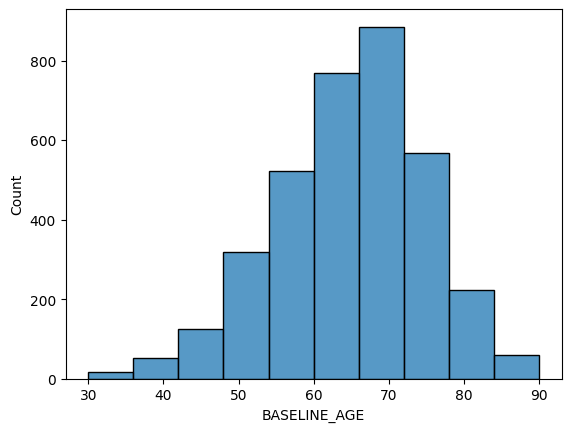

In [81]:
cases_df = reorder_enrollment_pheno_df.query('PHENO==2')['BASELINE_AGE']
sns.histplot(cases_df, bins=10)

In [82]:
reorder_enrollment_pheno_df.groupby(['RACE', 'PHENO'])['SEX'].value_counts()

RACE                                       PHENO  SEX
American Indian or Alaska Native            1     2         1
                                                  1         1
                                            2     1         3
Arab                                        2     1         2
Asian                                      -9     2         1
                                                  1         1
                                            1     2         7
                                                  1         2
                                            2     1        24
                                                  2        13
Black or African American                  -9     1         5
                                                  2         1
                                            1     2        47
                                                  1        31
                                            2     2        24
                